<a href="https://colab.research.google.com/github/IndriPutriMardiana/PCVK_ganjil_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Indri Putri Mardiana

No :  13

Kelas : TI 3B

# **MODUL 5 – Operasi Aritmatika dan Logika - Gamma Correction,**
# **Image Depth, PSNR, Average Denoising, Image Masking**

# F. **TUGAS** **PRAKTIKUM**


1. Buat Gamma Correction sesuai dengan petunjuk berikut
Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
dengan gamma correction sesuai rumus yang telah diberikan.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


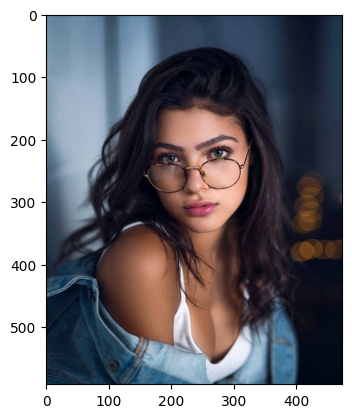

In [8]:

import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread('/content/drive/MyDrive/PCVK/femalee.jpg')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)


Mmebuat Gamma

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


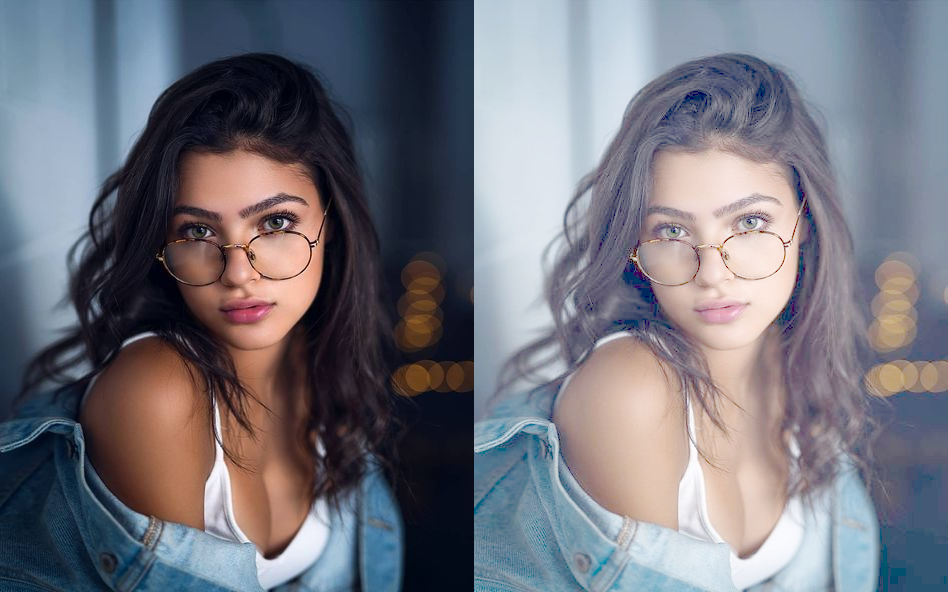

In [9]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)


2. Buat Simulasi Image Depth

Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
7bit, maka jumlah warnanya adalah 27
 = 128, dst.
Berikut adalah kode untuk membaca citra masukan dan memberi nilai kedalaman citra,
silahkan lanjutkan kode program berikut sehingga menghasilkan keluaran seperti contoh
pada Gambar.

 Buat Simulasi Image Depth

 Bit Depth pada Citra [STATIS]
---------------------------------


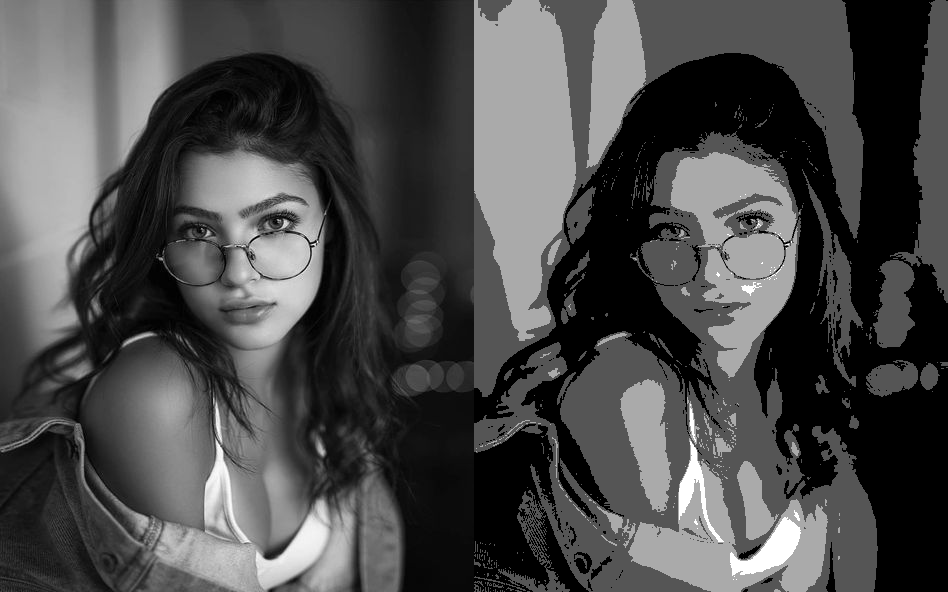

In [10]:

print(' Bit Depth pada Citra [STATIS]')
print('---------------------------------')

bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread("/content/drive/MyDrive/PCVK/femalee.jpg", cv.IMREAD_GRAYSCALE)

bit_depth_image = np.zeros(original.shape, original.dtype)

#akses per piksel -> hanya 2 loop karena greyscale hanya 2 matriks
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
       bit_depth_image[y,x] = np.clip(round(original[y,x] / level) * level, 0, 255)

final_frame = cv.hconcat((original, bit_depth_image))
cv2_imshow(final_frame)

 Bit Depth pada Citra [DINAMIS]
---------------------------------
Masukkan nilai bit depth: 2


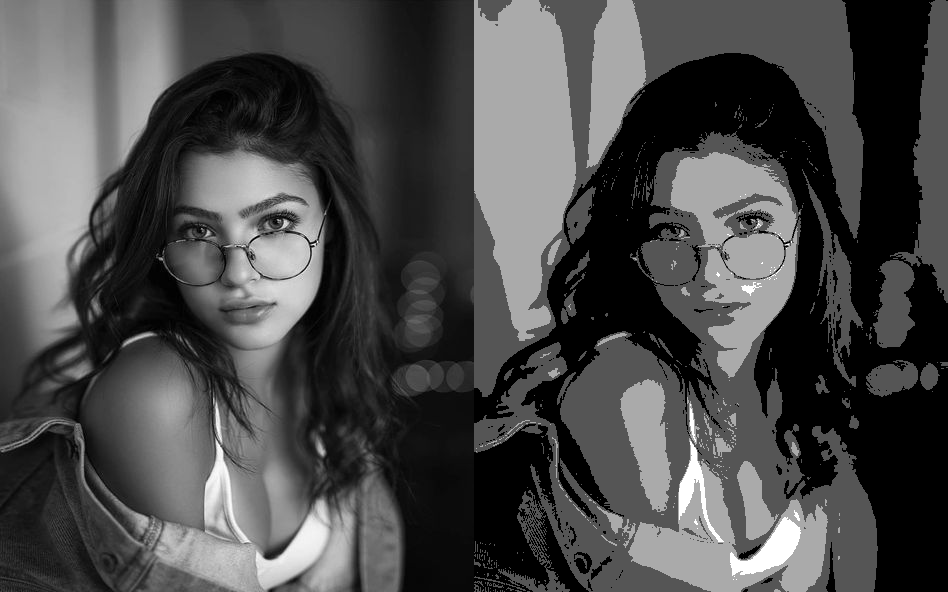

In [11]:
print(' Bit Depth pada Citra [DINAMIS]')
print('---------------------------------')

try:
  bd = float(input('Masukkan nilai bit depth: '))
except ValueError:
  print('Error, not a number')

bit_depth = 2**bd
level = 255 / (bit_depth - 1)



original = cv.imread("/content/drive/MyDrive/PCVK/femalee.jpg", cv.IMREAD_GRAYSCALE)

bit_depth_image = np.zeros(original.shape, original.dtype)

#akses per piksel -> hanya 2 loop karena greyscale hanya 2 matriks
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
       bit_depth_image[y,x] = np.clip(round(original[y,x] / level) * level, 0, 255)

final_frame = cv.hconcat((original, bit_depth_image))
cv2_imshow(final_frame)

3. Buat modul Average Denoising

Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya.
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
gunakan modul glob (import glob).

Buat modul Average Denoising

Nomor 3 (citra: 5)

Nilai PSNR adalah 27.539010756553655 (dB)


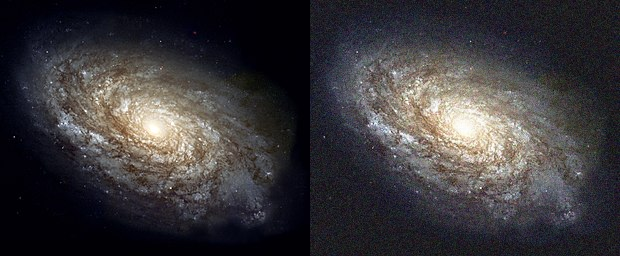

In [31]:
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/galaxyyy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)


Nilai PSNR adalah 27.517197325581346 (dB)


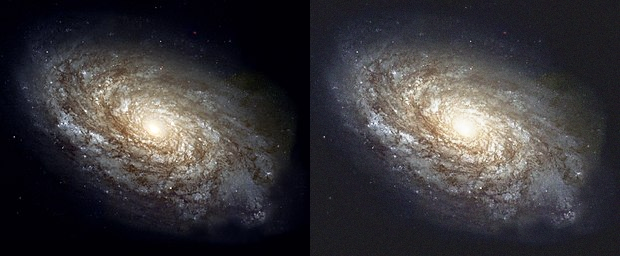

In [33]:
# 2. Jumlah Citra di Average - 30

dst = cv_img[0]
noise_number = 29
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.4969606419316 (dB)


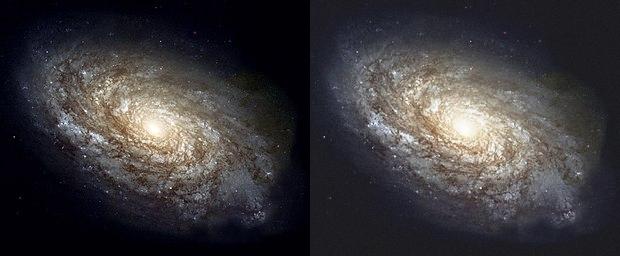

In [34]:
# 3. Jumlah Citra di Average - 60

dst = cv_img[0]
noise_number = 59
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)


Nilai PSNR adalah 27.51077406091288 (dB)


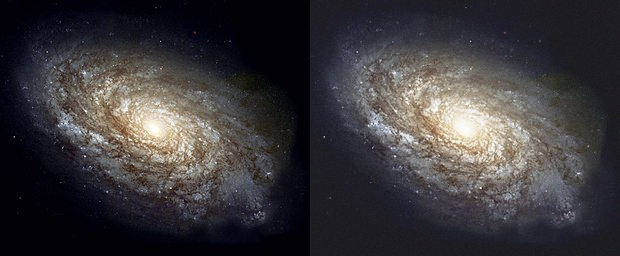

In [35]:
# 4. Jumlah Citra di Average - 80

dst = cv_img[0]
noise_number = 79
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)


Nilai PSNR adalah 27.513633967263907 (dB)


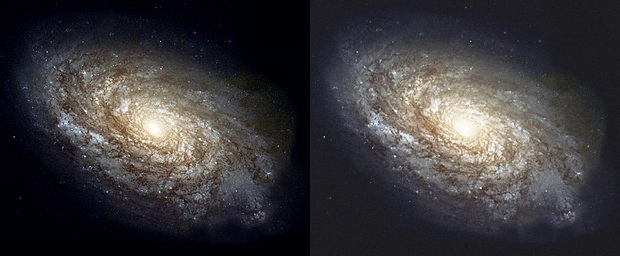

In [36]:
# 5. Jumlah Citra di Average - 100

dst = cv_img[0]
noise_number = 99
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Dari hasil PSNR yang anda catat pada tabel diatas, kesimpulan yang dapat diambil adalah :
pada gambar original terlihat berbeda dengan gambar noises. Pada saat kita memasukkan noise_number itu adalah jumlah citra di average, pada saat jumlahnya 5 maka noise gambar yang dihasilkan masih hampir sama, namun pada saat jumlah ke 80 ataupun 100 gambar noise yang dihasilkan akan pecah, hal tersebut karena noise yang dihasilkan adalah pecahan dari gambar originalnya, sehingga gambar tersebut semakin besar average yang dimasukkan maka akan semakin pecah hasilnya.


In [56]:
#import gambar yang akan di gunakan terlebih dahulu
img_taylor = cv.imread('/content/drive/MyDrive/PCVK/couple.png')

# OR

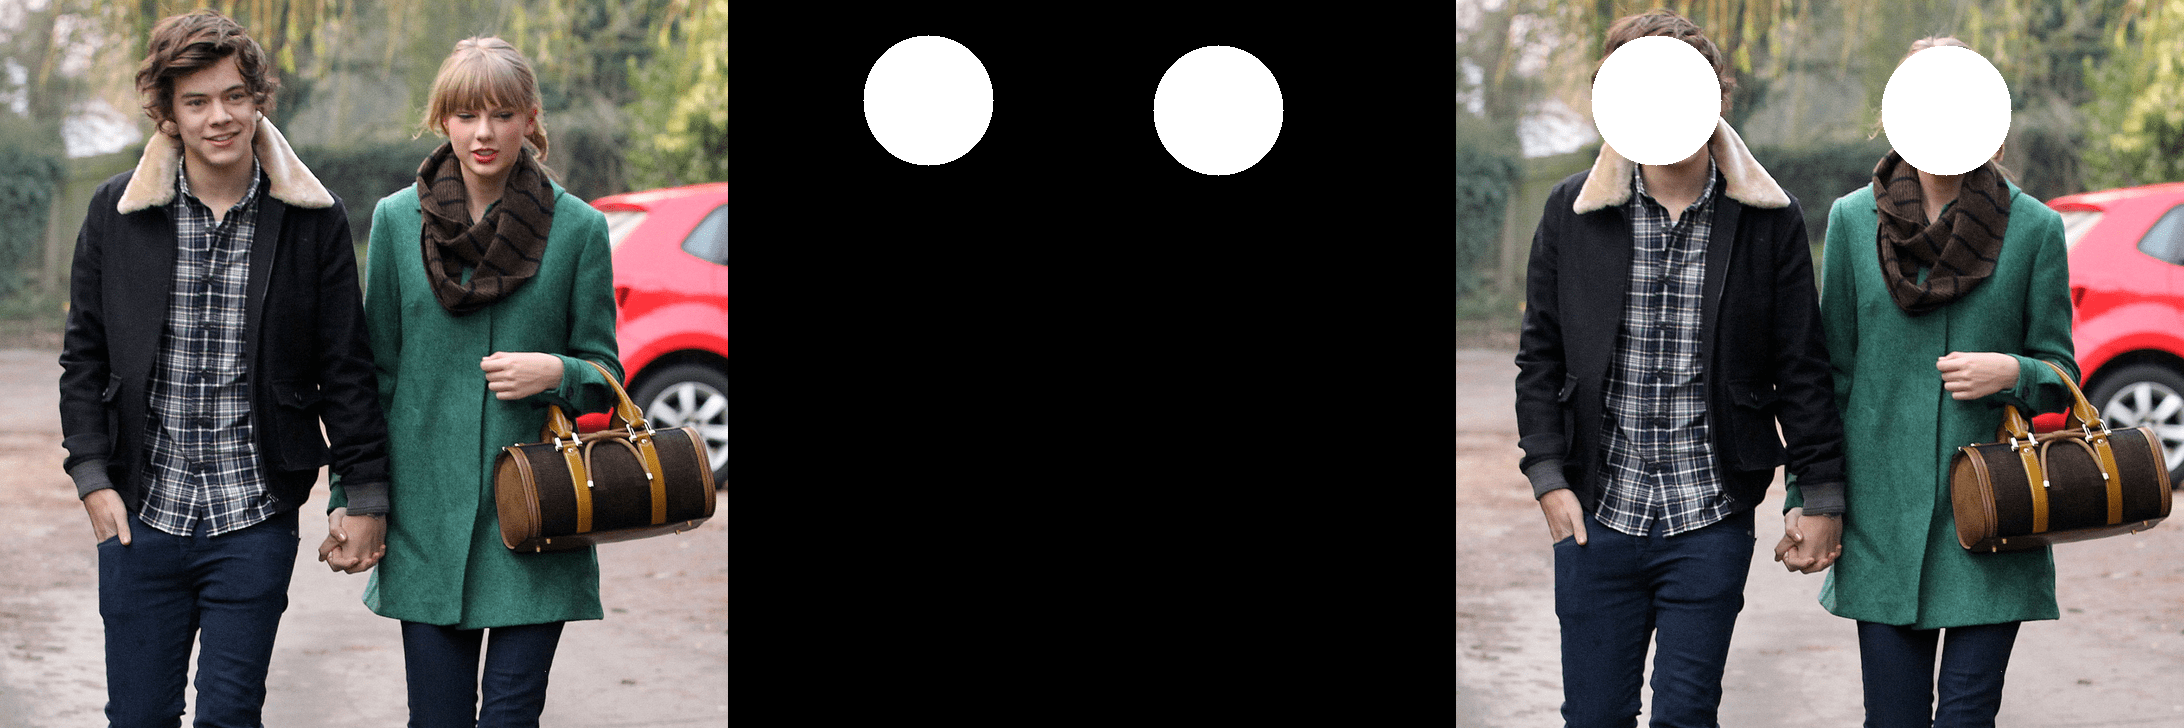

In [81]:
#OR
mask = np.zeros(img_taylor.shape, img_taylor.dtype)
mask = cv.circle(mask, (200, 100), 65, (255,255,255), -1)

result = img_taylor & mask

mask1 = cv.circle(mask, (490, 110), 65, (255,255,255), -1)

result = img_taylor & mask1

masked = img_taylor | mask

taylor_frame = cv.hconcat((img_taylor, mask, masked))
cv2_imshow(taylor_frame)

# NOT

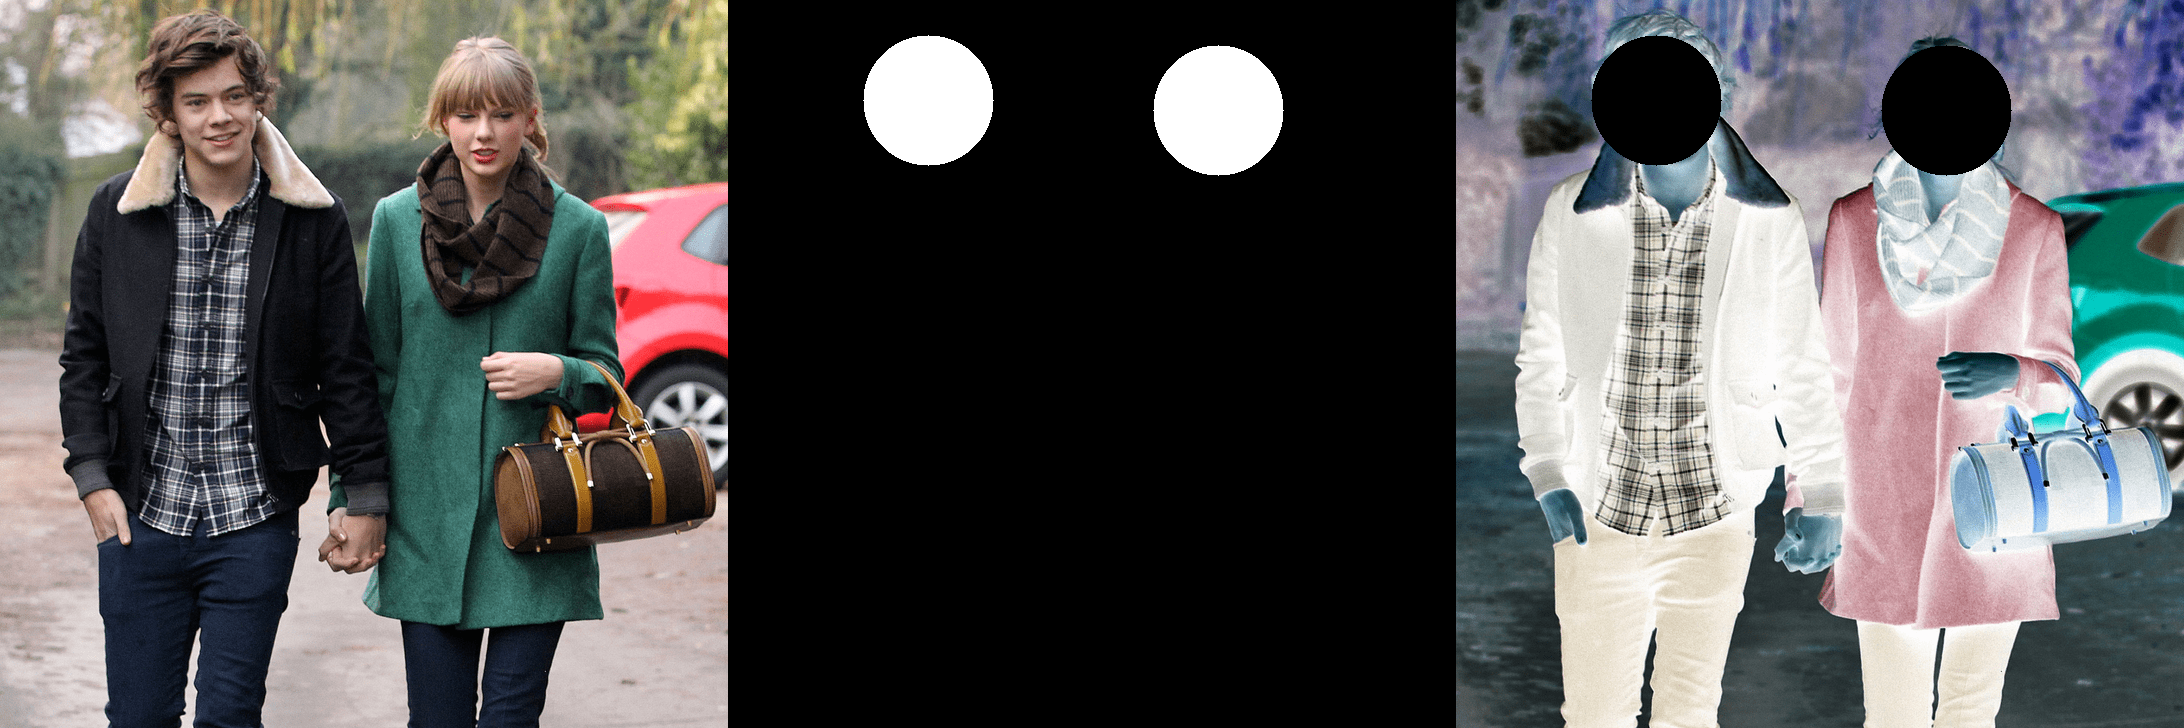

In [79]:
mask = np.zeros(img_taylor .shape, dtype=np.uint8)
mask = cv.circle(mask, (200, 100), 65, (255,255,255), -1)

mask1 = cv.circle(mask, (490, 110), 65, (255,255,255), -1)

masked = ~img_taylor  & ~mask

taylor_frame = cv.hconcat((img_taylor, mask, masked))
cv2_imshow(taylor_frame)

# NAND

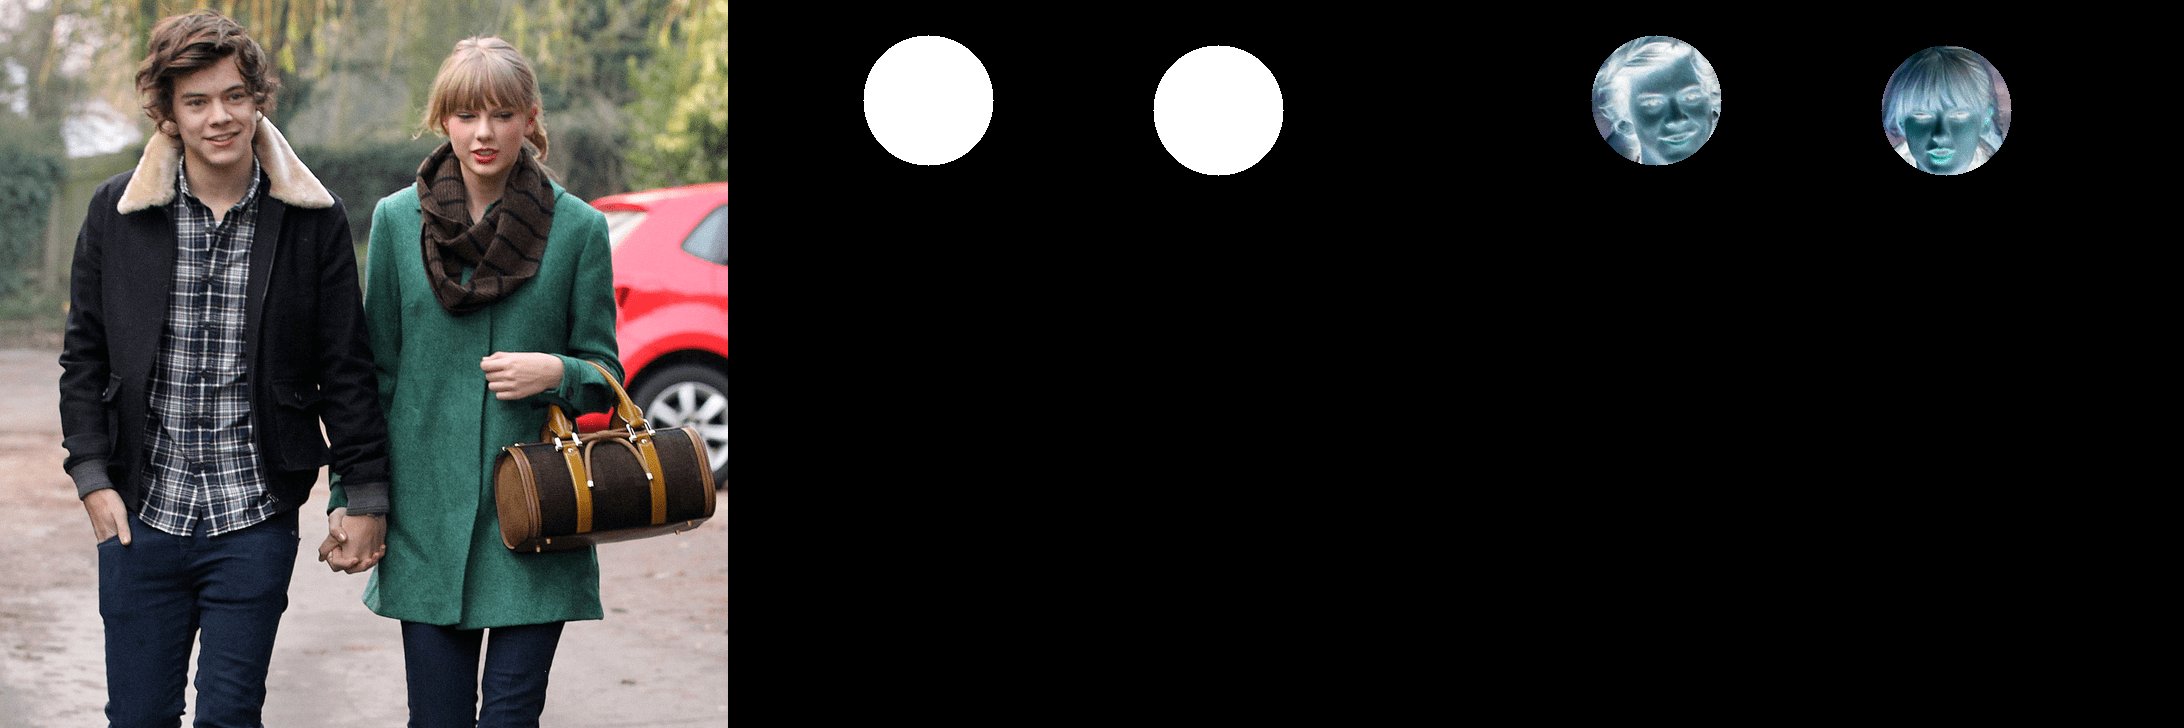

In [74]:
mask = np.zeros(img_taylor.shape, dtype=np.uint8)
mask = cv.circle(mask, (200, 100), 65, (255,255,255), -1)
mask1 = cv.circle(mask, (490, 110), 65, (255,255,255), -1)

masked = ~img_taylor & mask

taylor_frame = cv.hconcat((img_taylor, mask, masked))
cv2_imshow(taylor_frame)

# XOR

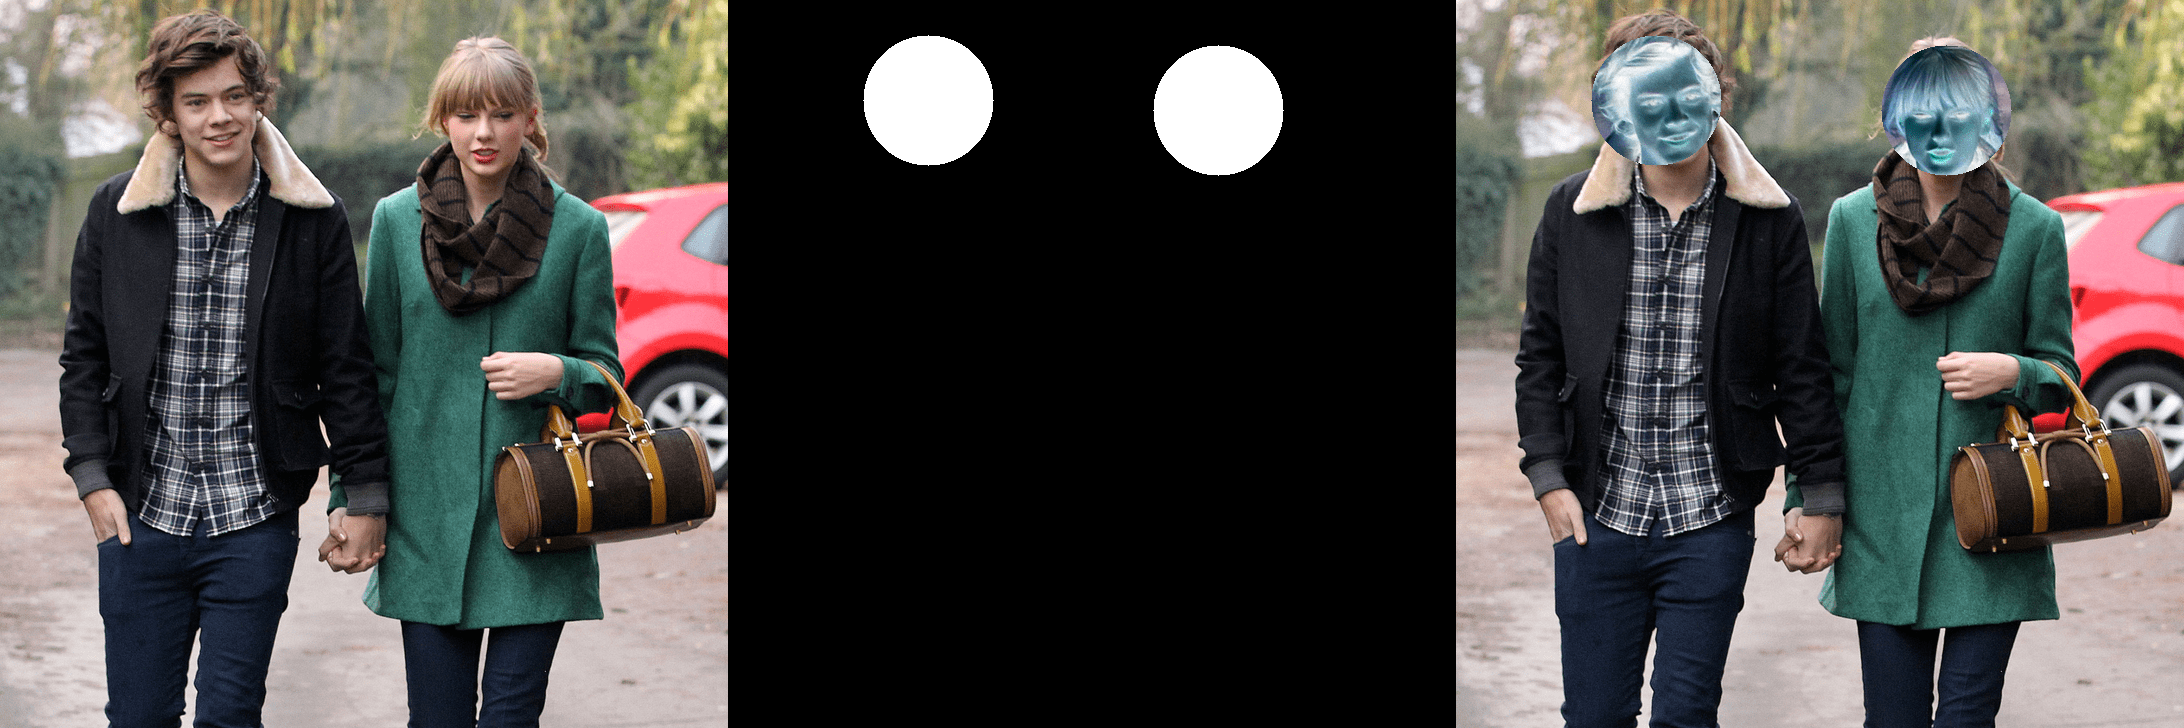

In [76]:

mask = np.zeros(img_taylor.shape, dtype=np.uint8)
mask = cv.circle(mask, (200, 100), 65, (255,255,255), -1)
mask1 = cv.circle(mask, (490, 110), 65, (255,255,255), -1)

masked = img_taylor ^ mask

taylor_frame = cv.hconcat((img_taylor, mask, masked))
cv2_imshow(taylor_frame)

# AND

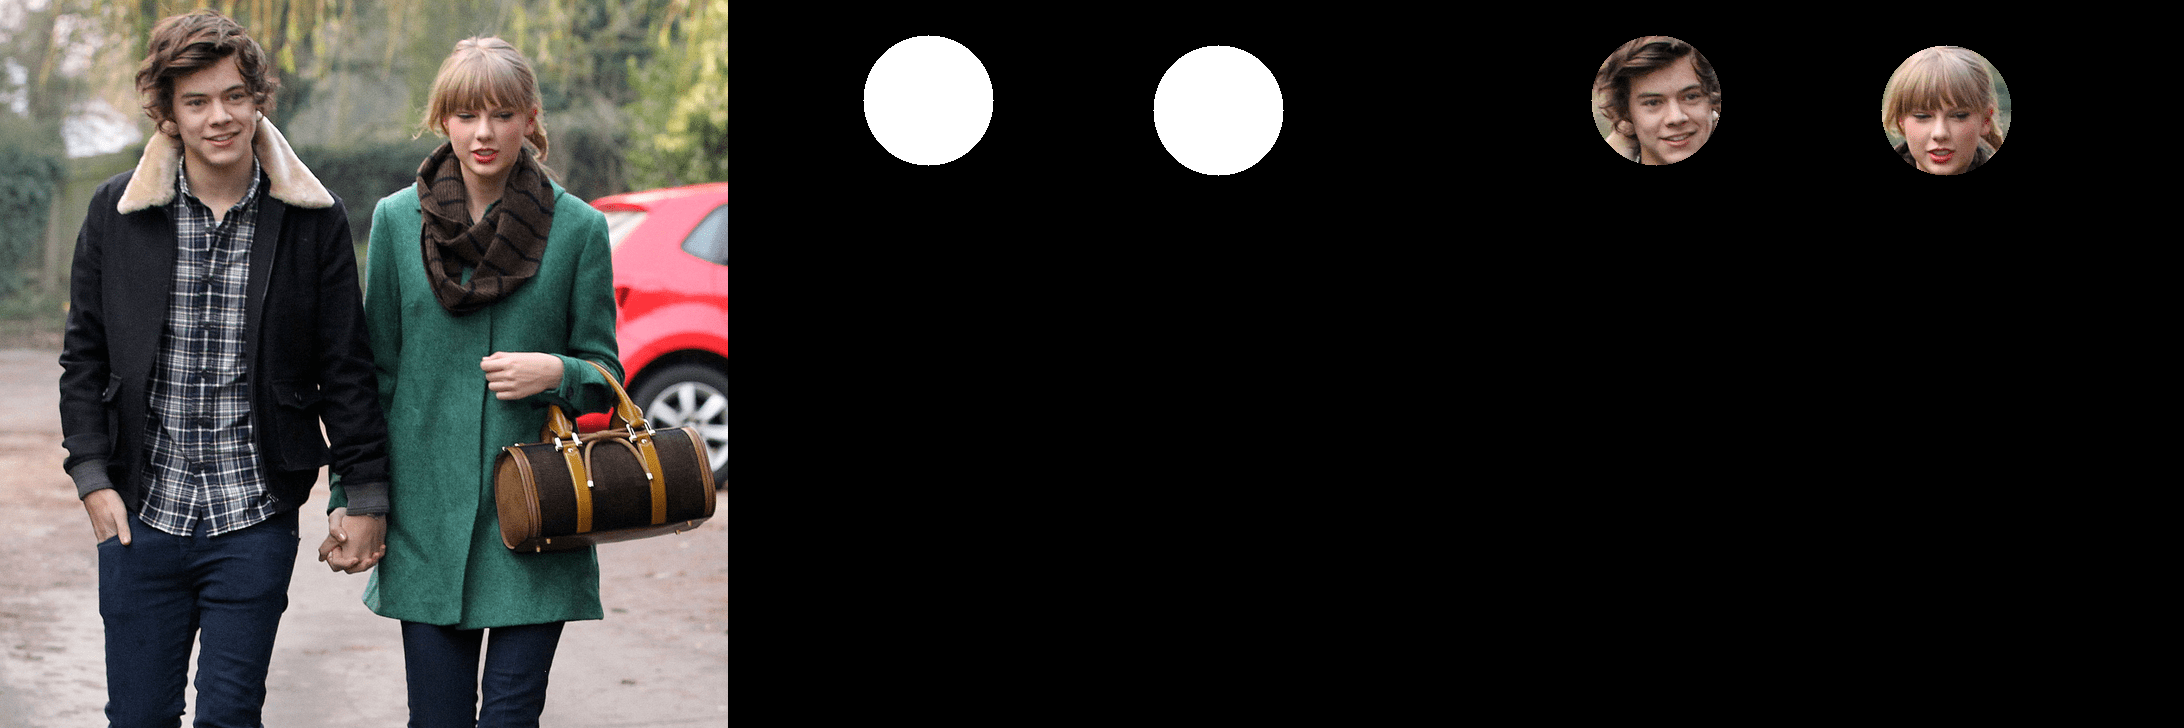

In [82]:
mask = np.zeros(img_taylor.shape, dtype=np.uint8)
mask = cv.circle(mask, (200, 100), 65, (255,255,255), -1)
mask1 = cv.circle(mask, (490, 110), 65, (255,255,255), -1)
masked = img_taylor & mask

taylor_frame = cv.hconcat((img_taylor, mask, masked))
cv2_imshow(taylor_frame)

# Tuliskan hasil analisa anda: Pada percobaan ini kita mencooba untuk masking gambar dengan menggunakan operator, pada operator OR kita hanya masking wajah orang dengan menggunakan masked = img_taylor | mask, lalu pada operator NOT saya menggunakan masked = ~img_taylor  & ~mask yaitu untuk menutupi foto wajah yang di mask, lalu yang ketiga yaitu NAND yaitu dengan mask wajah yang ditentukan  kemudian menggunakan masked = ~img_taylor & mask sehingga hasilnya adalah hanya wajah yang di mask yang ditampilkan, lalu yang keempat yaitu XOR menggunakan masked = img_taylor ^ mask, sehingga hasilnya adalah memilih wajah yang di mask, kemudian hasil yang ditampilkan adalah wajah yang dimask terdapat circle dengan warna gambar yang berbeda.

